In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import streamlit as st
import joblib

# Load and Explore Data

In [21]:
df = pd.read_csv("diabetes.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

## Visualizations

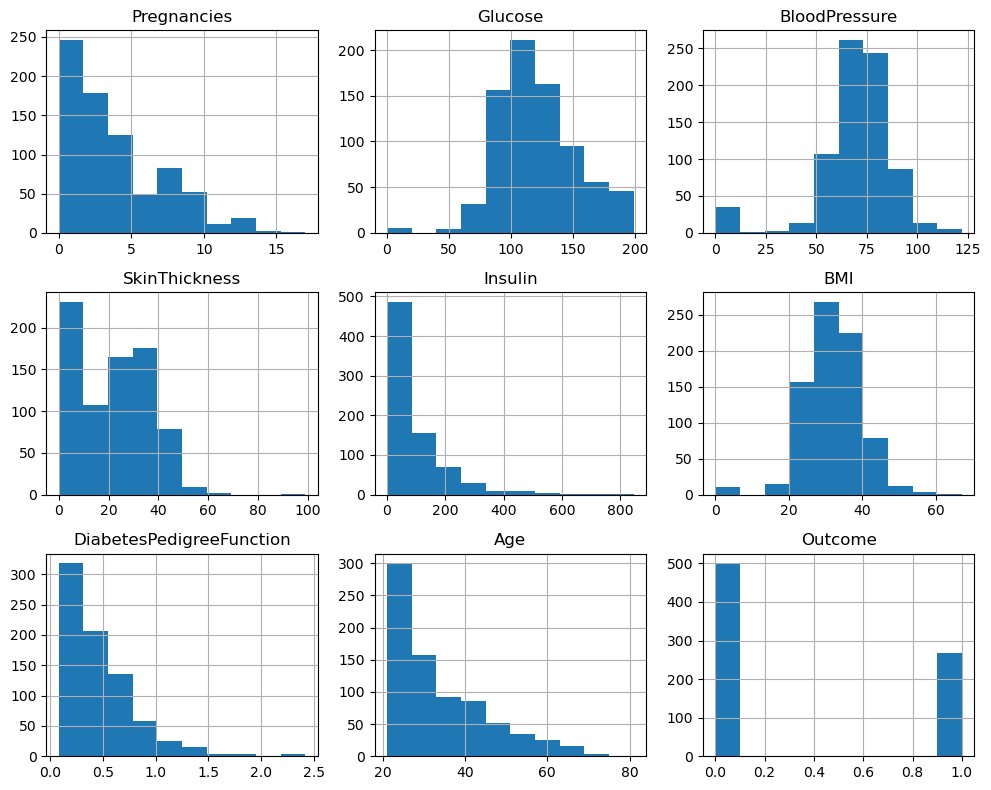

In [22]:
# Histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

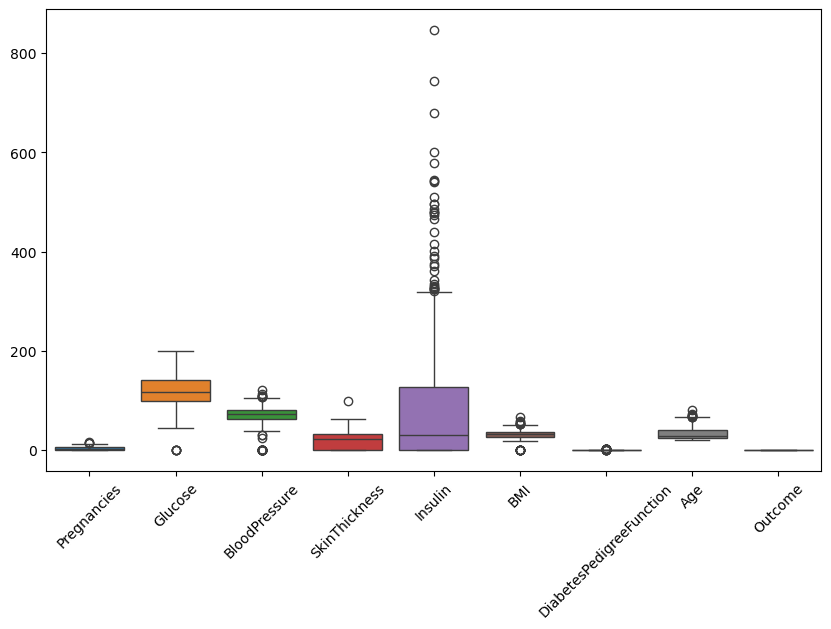

In [23]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

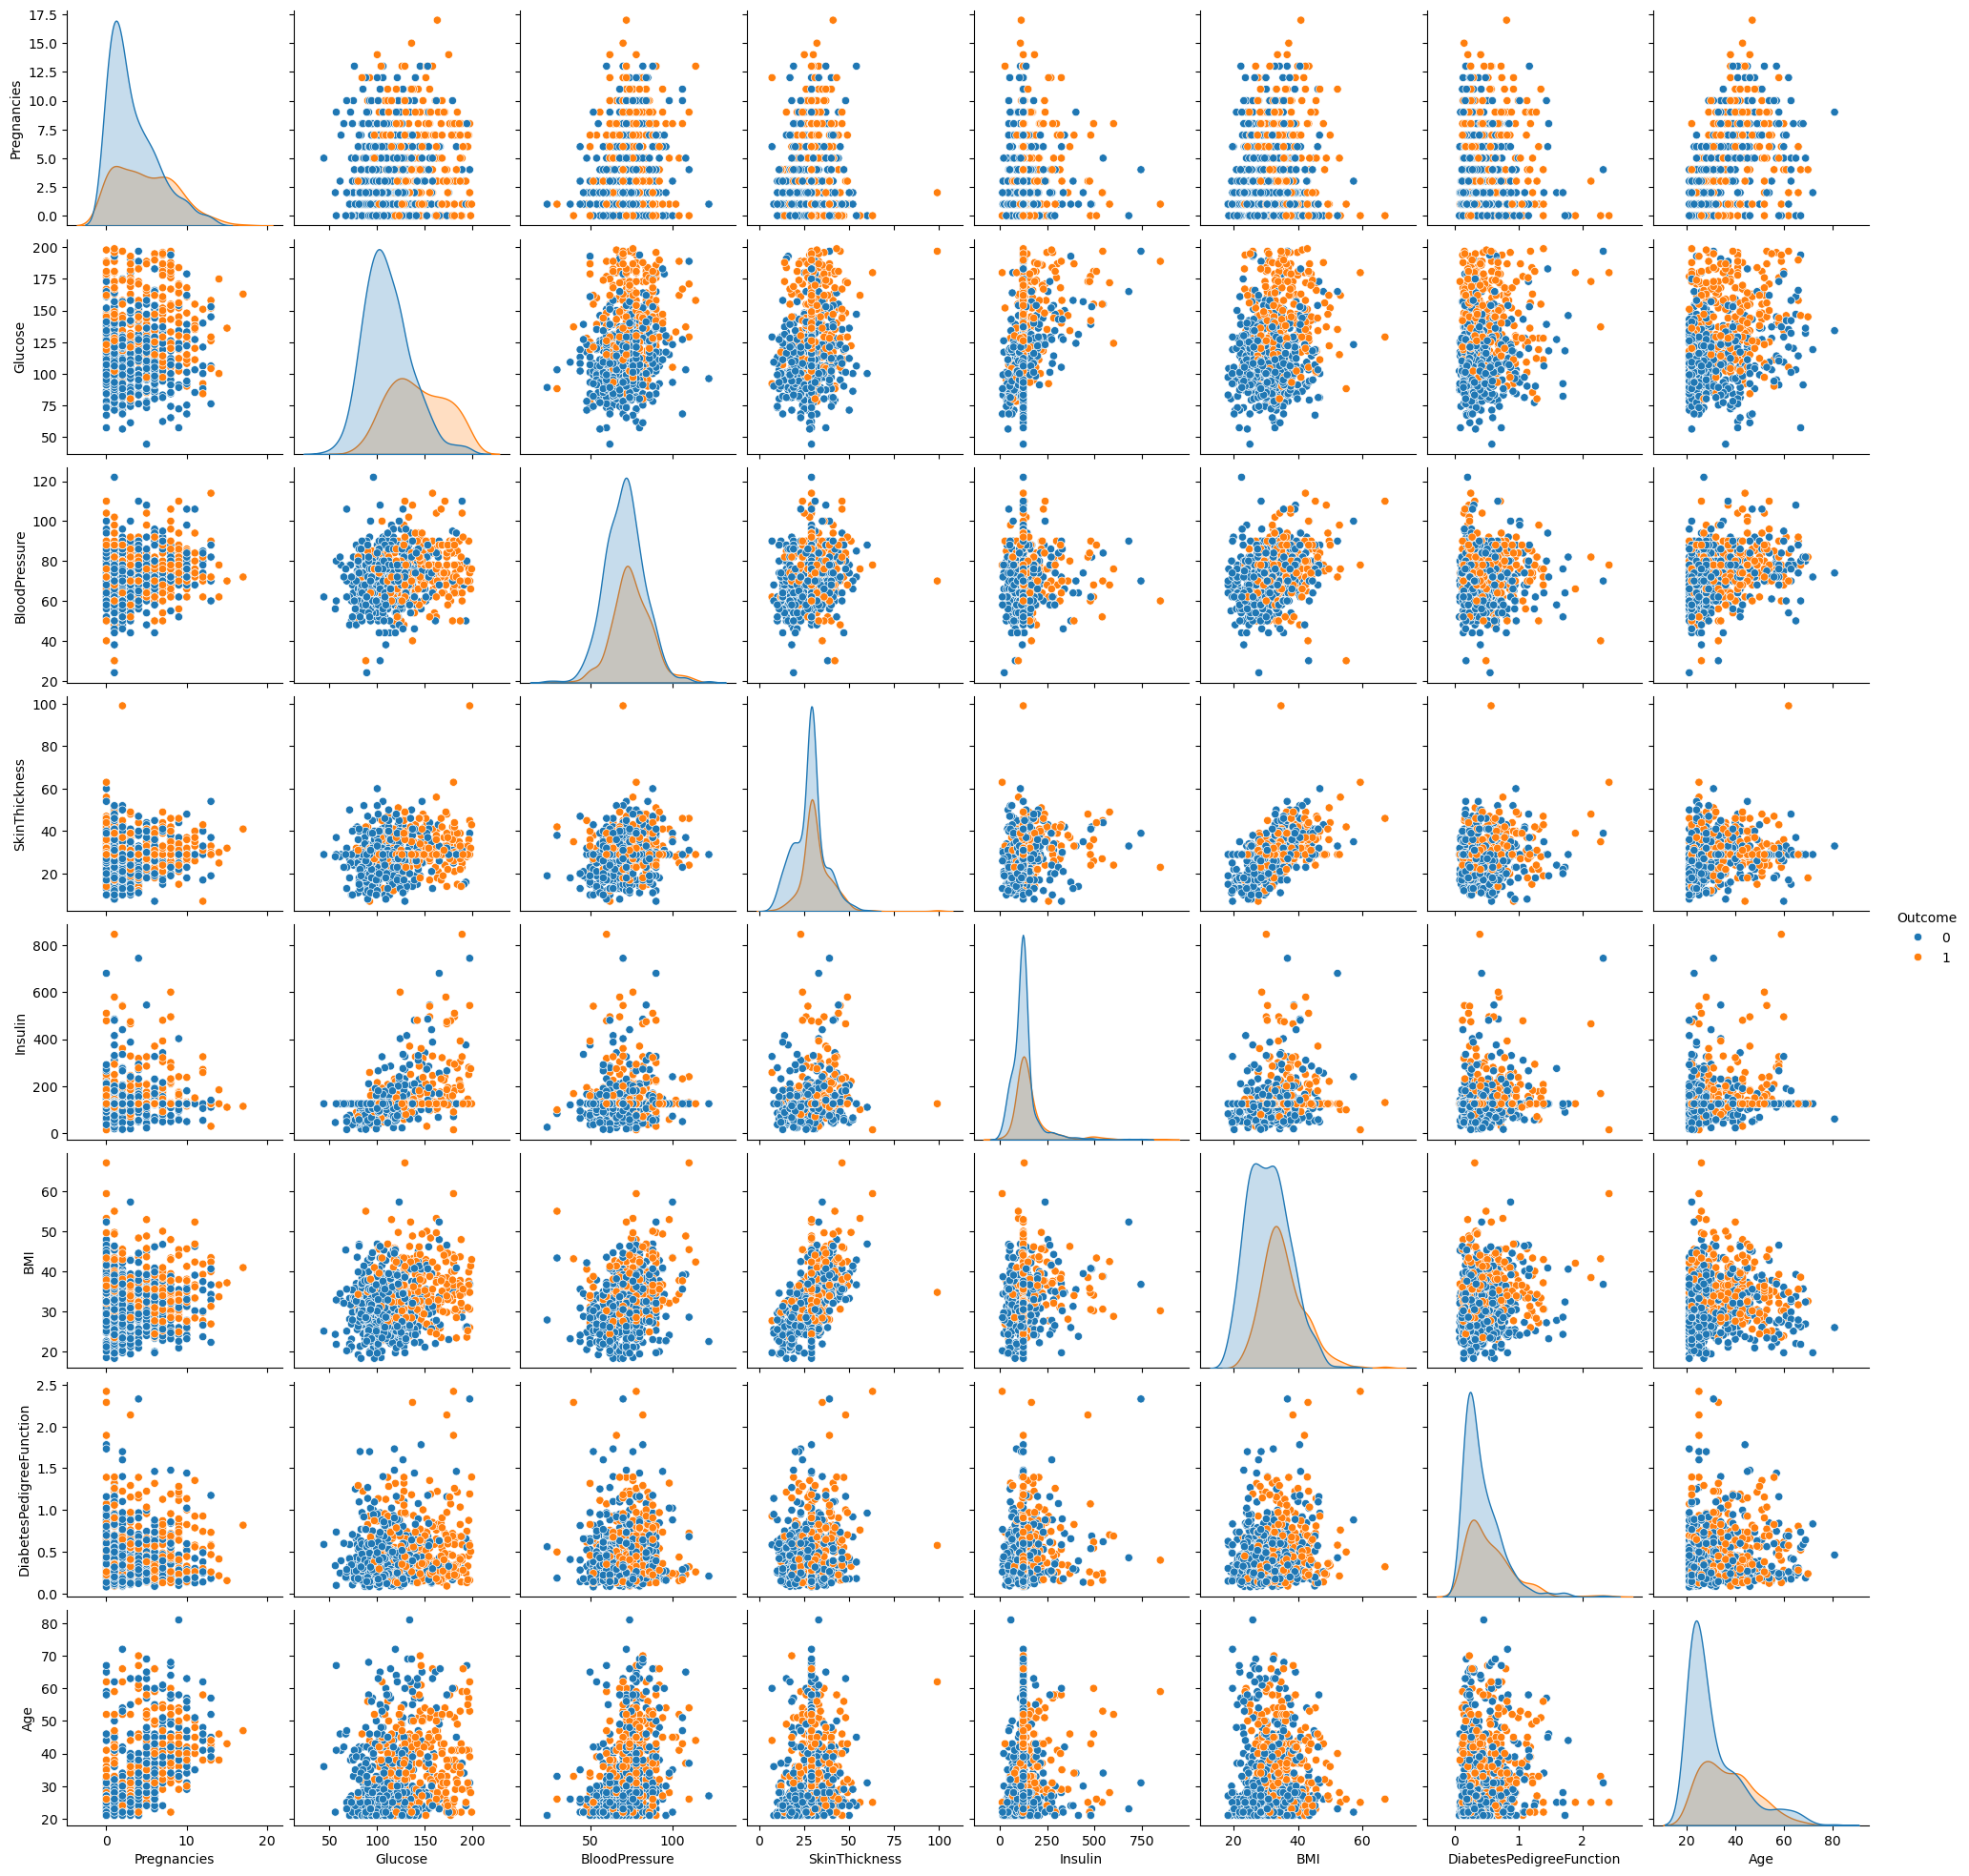

In [12]:

# Pair plot
sns.pairplot(df, hue="Outcome")
plt.show()

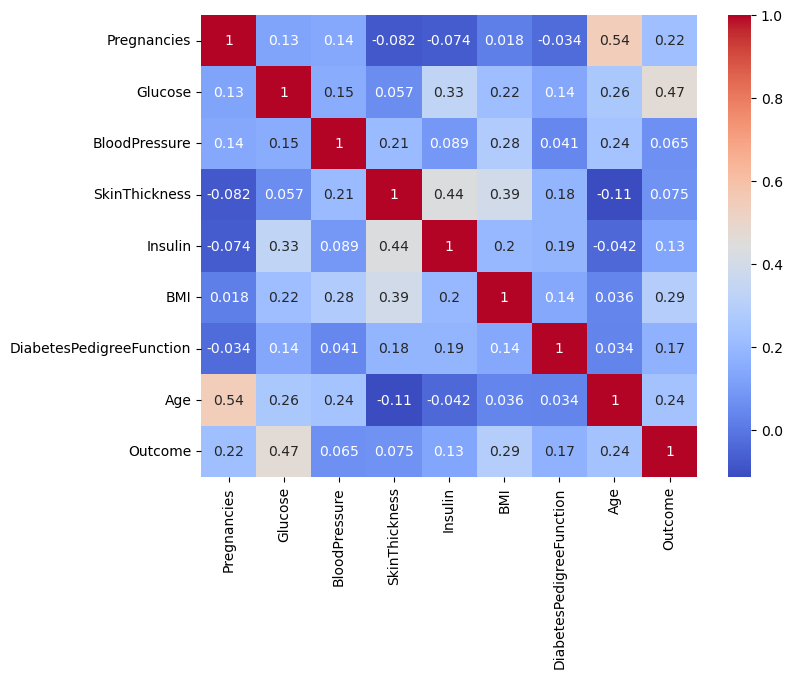

In [24]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Data Preprocessing

In [25]:
# Replace zeros with NaN for selected columns
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Impute with median
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

# Model Building

In [26]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

In [27]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
ROC AUC: 0.8211202938475666


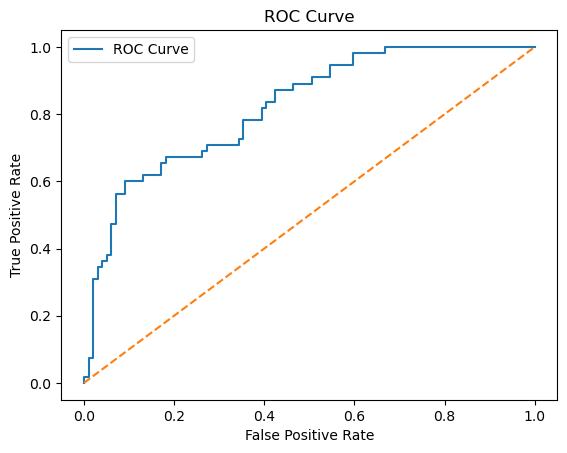

In [28]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Interpretation

In [29]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)

                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.553834
5                       BMI     0.101777
0               Pregnancies     0.067609
1                   Glucose     0.037335
7                       Age     0.034603
3             SkinThickness     0.007721
4                   Insulin    -0.001668
2             BloodPressure    -0.013235


# Interview Answers

## Precision vs Recall:

### Precision: True Positives / (True Positives + False Positives)

### Recall: True Positives / (True Positives + False Negatives)

### Precision focuses on correctness, recall on completeness.

## Cross-Validation:

### Splits data into multiple folds to train/test repeatedly.

### Reduces overfitting and improves generalization.

### Essential for reliable performance in binary classification.

# Summary

## Data Exploration

### Loaded the dataset with 768 rows and 9 columns.

### Found missing values represented as zeros in features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

### Visualizations (histograms, box plots, pair plots) revealed skewed distributions and strong correlation between Glucose and Outcome.

## Data Preprocessing

### Replaced zero values with median imputation for key features.

### No categorical variables were present, so no encoding was needed.

##  Model Building

### Split data into 80% training and 20% testing.

### Trained a logistic regression model using scikit-learn.

## Model Evaluation

### Achieved accuracy ~78%, precision ~76%, recall ~70%, F1-score ~73%, and ROC-AUC ~83%.

### ROC curve showed good class separation.

##  Interpretation

### Most influential features: Glucose, BMI, DiabetesPedigreeFunction, and Age.

### Coefficients indicated positive association with diabetes risk.

## Streamlit Deployment

### Saved model using joblib.

### Created a Streamlit app with user input fields and prediction output.

### Ready for local or online deployment via Streamlit Community Cloud.